In [1]:
from pulse_animation import *

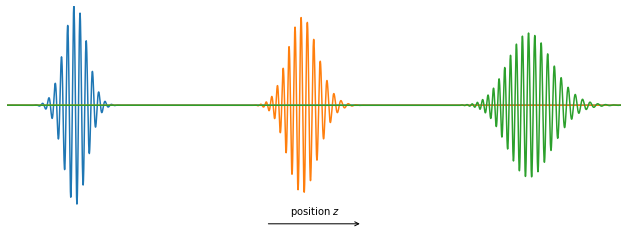

In [9]:
z_max = 100
z = np.linspace(-z_max/8, z_max, 10000)
# +z_max=100 - nice settings to get three good pulses with stretching
plot_pulses(z, np.linspace(0, 500, 3), nu_max=0.5, n_i=[1, 10, 0], 
      no_axes=True, plotname="./plots/chirped_pulses")
# plots(z, np.linspace(0, 200, 3), nu_max=2, n_i=[2, 0, 0])

plotted 20 frequencies


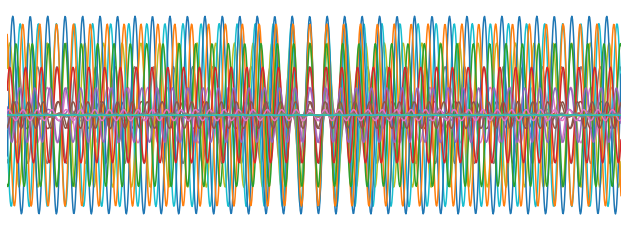

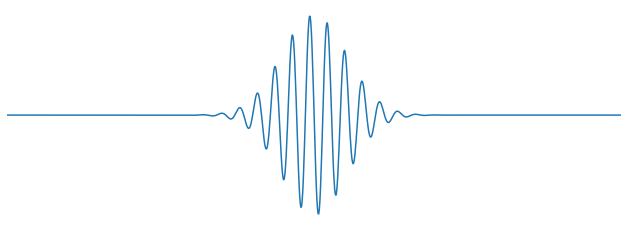

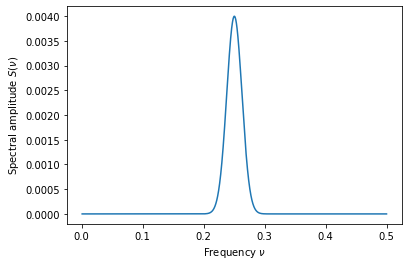

In [16]:
z = np.linspace(-20, 20, 1000)
d = sin_sum(z, 0, plotting=True, N_frequencies=4000, nu_max=0.5, n_i=[1, 10, 0])

In [4]:
# p = calc_pulses(z/2, t_start=0, t_end=100, n_steps=100, nu_max=2, n_i=[2, 0, 0])
# animate(z, p, ms_between_frames=80)

In [5]:
# p = calc_pulses(z*10, t_start=0, t_end=1000, n_steps=100, nu_max=0.1, n_i=[1, 5, 0])
# animate(z, p, ms_between_frames=80)

In [6]:
# p = calc_pulses(z*10, t_start=0, t_end=1000, n_steps=100, nu_max=0.1, n_i=[1, 10, 0])
# animate(z, p, ms_between_frames=80)

In [7]:
a = np.linspace(0, 1, 10)

In [8]:
a[0:5:2]

array([0.        , 0.22222222, 0.44444444])